## **Các bạn dùng link này lấy data để hoàn thành HW nhé:** https://drive.google.com/file/d/1YEP-CT4KTPzqDBbQeWDtsCI9uqaxRDFK/view?usp=sharing

## HW1

### HW1.1 

p-norm của một vector $v=(v_1, v_2, ..., v_n), v \in R^n $ được định nghĩa như sau $||v||_p = \sqrt[p]{v_1^p + v_2^p + ... + v_n^p}$. Viết function nhận 2 giá trị vector và p để trả về giá trị p-norm tương ứng. (Khi p=2, còn được gọi là Euclidean norm)

vd: 


```python
v = [1, 2, 3, 3, 1 ]
p = 3
norm(v,p)
>> 4.0
```



--------------------------------------------------------
**SOLUTION**

In [ ]:
# Cách 1: cho kết quả gần đúng
import numpy as np
v = [1, 2, 3, 3, 1 ]
p = 3
def norm(v,p):
    array_v = np.array(v)
    sum = np.sum(array_v**p)
    res = sum**(1/float(p))
    return res
norm(v,p)

3.9999999999999996

In [ ]:
!apt install libmpc-dev
!apt install python3-pip
!pip install --user gmpy2==2.1.0a2

In [ ]:
# Cách 2 cho kết quả chính xác hơn nhưng cần cài đặt thư viện gmpy2
import numpy as np
import gmpy2
v = [1, 2, 3, 3, 1 ]
p = 3
def norm(v,p):
    array_v = np.array(v)
    sum = np.sum(array_v**p)
    res = float(gmpy2.root(float(sum),p))
    return res
norm(v,p)

4.0

In [ ]:
float(gmpy2.root(64,3))

4.0

In [ ]:
float(64**(1/3.0))

3.9999999999999996

1.2 

### HW1.2
Viết đoạn code tìm giá trị a,b,c,d trong hệ phương trình dưới đây **(không sử dụng np.linalg.lstsq)**:

$
\begin{align}
3a + 4b - 5c + d &= 10\\
2a + 2b + 2c - d &= 5\\
a -b + 5c - 5d &= 7\\
5a + d &= 4
\end{align}
$

--------------------------------------------------------
**SOLUTION**

Sử dụng công thức Least Square Estimation bên dưới:

$\begin{align}
Ax &= b \\        
A^TAx &= A^Tb \\
x &= (A^TA)^{-1}A^Tb
\end{align}
$

Có 3 thành phần cần xác định: ma trận A, vector x, vector b

- x: vector gồm các element là biến cần tìm (a, b, c, d)
- b: vector gồm các element là kết quả từng phương trình trong hệ phương trình (10, 5, 7, 4)
- A: là ma trận gồm mỗi cột là hệ số tương ứng cho các biến (a, b, c, d), mỗi hàng là một phương trinh. Số cột = số biến, và số hàng = số các kết quả  
- Tại phương trình cuối $5a+d=4$ hệ số của b và c đều là 0

In [ ]:
 aimport numpy as np
A = np.array([[3, 4, -5, 1],
              [2, 2, 2, -1],
              [1, -1, 5, -5],
              [5, 0, 0, 1]]) 
b = np.array([10, 5, 7, 4])

x = np.linalg.inv(A.T@A)@A.T@b
x

array([ 1.24778761,  1.01769912, -0.88495575, -2.23893805])

 Dùng x tìm b để check kết quả

In [ ]:
# Dùng x tìm b để check kết quả
A@x

array([10.,  5.,  7.,  4.])

Kiểm tra kết quả bằng method của numpy

In [ ]:
# Kiểm tra kết quả bằng method của numpy
np.linalg.lstsq(A,b.reshape((-1,1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([[ 1.24778761],
        [ 1.01769912],
        [-0.88495575],
        [-2.23893805]]),
 array([], dtype=float64),
 4,
 array([9.23609236, 6.5094485 , 3.4021982 , 1.65732478]))

### HW1.3: 
Tìm hiểu về transformation matrix. Áp dụng cho ảnh 2D.
- Tìm matrix A có thể giúp cho xoay ảnh mọi góc $\theta$ trong range [-360, 360]
- Viết function xoay ảnh, nhận input là ảnh và góc xoay $\theta$. Trả về ouput là ảnh đã xoay theo góc $\theta$

Yêu cầu 1: Ảnh đã được xoay có kích thước bằng với ảnh input. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

Yêu cầu 2 **(*)** (Optional): Ảnh đã được xoay có kích thước thay đổi kích thước phù hợp để đảm bảo các thông tin trong ảnh input không bị mất. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

VD: rotate(img, 45)


VD output của Yêu cầu 1 khi xoay ảnh 45 độ 

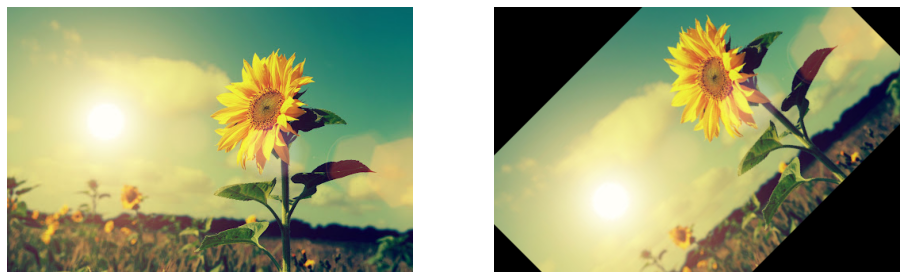

VD output của Yêu cầu 2 khi xoay ảnh 45 độ 

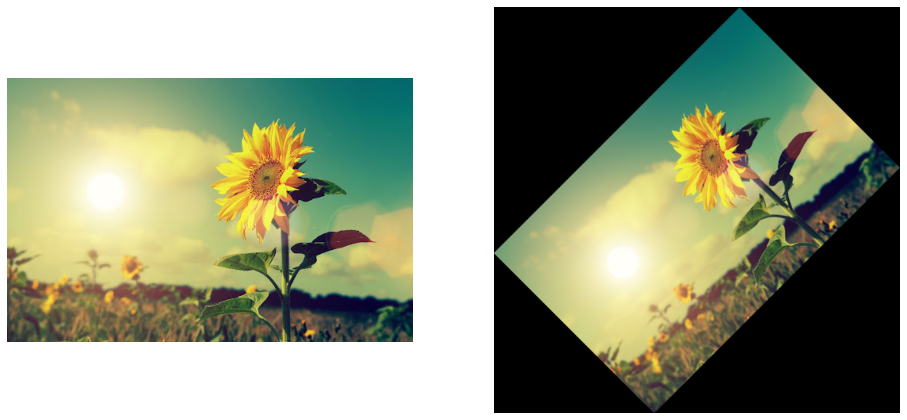

--------------------------------------------------------
**SOLUTION**

Rotation matraix A (2D)= 
$ \left[ {\begin{array}{cc}
    cos(\theta) & -sin(\theta) \\
    sin(\theta) & cos(\theta) \\
  \end{array} } \right]$

Trong đó $\theta$ là góc cần xoay ngược chiều kim đồng hồ 

**Yêu cầu 1: Ảnh đã được xoay có kích thước bằng với ảnh input. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)**

- **Step1:** Khởi tạo rotation matrix, new_iamge màu đen.
- **Step2:** Chọn pivot_point là điểm sẽ được cố định và ảnh xoay quanh điểm này
- **Step3:** Lấy từng vị trí trong từng ảnh input, convert theo tọa độ của pivot_point, dùng rotate matrix để transform từng vị trí để lấy được vị trí mới đã được xoay theo $\theta$. Convert vị trí từ tọa độ pivot_point sang tọa độ bình thường của ảnh input (dời gốc tọa độ). Vị trí nào là vị trí âm thì loại.  Các vị trí còn lại sẽ được đưa vào new_iamge và lấy giá trị của vị trí trước khi xoay trong ảnh input 

In [ ]:
!gdown --id "1fPWPrgXxDaxPsOie25IKfsQWqzL7HaIX"

Downloading...
From: https://drive.google.com/uc?id=1fPWPrgXxDaxPsOie25IKfsQWqzL7HaIX
To: /content/sun.jpg
100% 45.6k/45.6k [00:00<00:00, 37.8MB/s]


In [ ]:
import numpy as np
import cv2
def change_angle_to_radius_unit(angle):
    angle_radius = angle * (np.pi/180)
    return angle_radius

def rotate(src_img,angle_of_rotation,pivot_point,shape_img):

    # Tạo rotation matrix A, transpose để xoay theo ngược chiều kim đồng hồ 
    rotation_mat = np.transpose(np.array([[np.cos(angle_of_rotation),-np.sin(angle_of_rotation)],
                            [np.sin(angle_of_rotation),np.cos(angle_of_rotation)]]))
    h,w = shape_img
    
    # pivot_point Điểm được coi là sẽ cố định và xoay ảnh quanh điểm đó
    pivot_point_x =  pivot_point[0]
    pivot_point_y = pivot_point[1]
    
    new_img = np.zeros(src_img.shape,dtype='u1') 

    for p_height in range(h): #h = number of row
        for p_width in range(w): #w = number of col
            # pivot_point xem như gốc tọa độ đưa các vị trí trong ảnh theo tọa độ này 
            xy_mat = np.array([[p_width-pivot_point_x],[p_height-pivot_point_y]])
            
            # Thực hiện xoay theo theta để lấy vị trí mới của 1 điểm ảnh 
            rotate_pos = np.dot(rotation_mat,xy_mat)
            
            # Đưa về tọa độ theo ảnh input 
            new_x = pivot_point_x + int(rotate_pos[0])
            new_y = pivot_point_y + int(rotate_pos[1])

            # vị trí nào bé hơn 0 sẽ bị loại 
            if (0<=new_x<=w-1) and (0<=new_y<=h-1): 
                # lấy giá trị trong ảnh input đưa vào vị trí mới 
                new_img[new_y,new_x] = src_img[p_height,p_width]

    return new_img

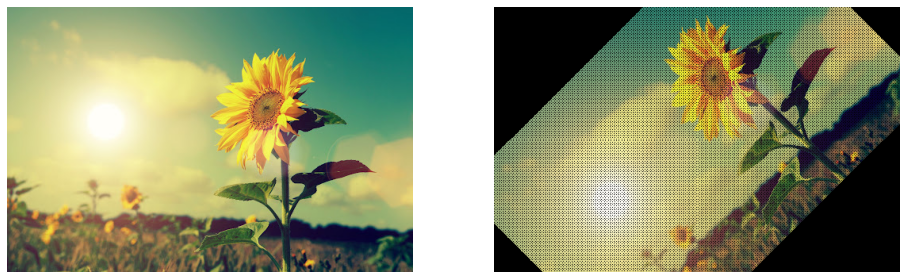

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate(img,change_angle_to_radius_unit(45),(img.shape[1]//2,img.shape[0]//2, ),img.shape[:2])
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()

In [ ]:
# Sử dụng Opencv
def rotate_without_bound(image, angle):
    # Lấy rotation matrix 
    # center (pivot_point)
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # lấy affine transformation matrix M
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    print(M)
 
    # xoay ảnh dự trên M
    return cv2.warpAffine(image, M, (w, h))

[[  0.70710678   0.70710678 -43.10616844]
 [ -0.70710678   0.70710678 229.93250353]]


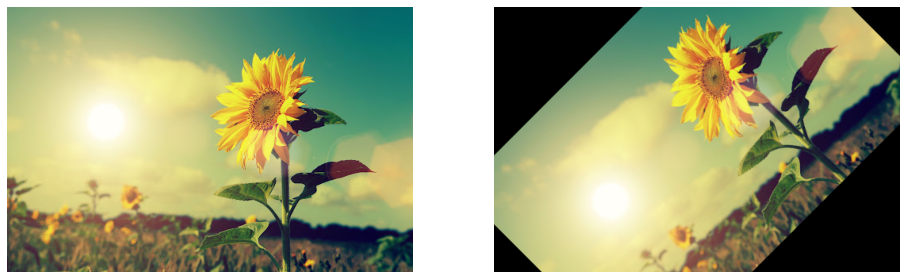

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate_without_bound(img, 45)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()

Three shears giúp giải quyết vấn đề aliasing 


$ \left[ {\begin{array}{cc}
    1 & -tan(\theta/2) \\
    0 & 1 \\
  \end{array} } \right]$
$ \left[ {\begin{array}{cc}
    1 & 0 \\
    sin(\theta) & 1 \\
  \end{array} } \right]$
$ \left[ {\begin{array}{cc}
    1 & -tan(\theta/2) \\
    0 & 1 \\
  \end{array} } \right]$
=
$ \left[ {\begin{array}{cc}
    cos(\theta) & -sin(\theta) \\
    sin(\theta) & cos(\theta) \\
  \end{array} } \right]$


$ \left[ {\begin{array}{cc}
    cos(-\theta) & -sin(-\theta) \\
    sin(-\theta) & cos(-\theta) \\
  \end{array} } \right]$
=
$ \left[ {\begin{array}{cc}
    cos(\theta) & sin(\theta) \\
    -sin(\theta) & cos(\theta) \\
  \end{array} } \right]$


In [ ]:
import numpy as np
import cv2
import math 
def change_angle_to_radius_unit(angle):
    angle_radius = angle * (np.pi/180)
    return angle_radius

def three_shears(angle_of_rotation, xy_mat):
    neg_angle_of_rotation = - angle_of_rotation
    shear_mat1 = np.array([[1, -np.tan(neg_angle_of_rotation/2)],
                           [0, 1]])
    shear_mat2 =np.array([[1, 0],
                           [np.sin(neg_angle_of_rotation), 1]])
    shear_mat3 = shear_mat1
    #shear 1
    new_xy = np.dot(shear_mat1, xy_mat) 
    new_xy = new_xy.astype(np.int64)
    # new_xy = np.array([int(new_xy[0]), int(new_xy[1])])
    #shear 2
    new_xy = np.dot(shear_mat2, new_xy) 
    new_xy = new_xy.astype(np.int64)
    # new_xy = np.array([int(new_xy[0]), int(new_xy[1])])
    #shear 3
    new_xy = np.dot(shear_mat3, new_xy) 
    new_xy = new_xy.astype(np.int64)
    # new_xy = np.array([int(new_xy[0]), int(new_xy[1])])
    return new_xy


def rotate(src_img,angle_of_rotation,pivot_point,shape_img):
    h,w = shape_img
    
    # pivot_point Điểm được coi là sẽ cố định và xoay ảnh quanh điểm đó
    pivot_point_x =  pivot_point[0]
    pivot_point_y = pivot_point[1]
    
    new_img = np.zeros(src_img.shape,dtype='u1') 

    for p_height in range(h): #h = number of row
        for p_width in range(w): #w = number of col
            # pivot_point xem như gốc tọa độ đưa các vị trí trong ảnh theo tọa độ này 
            xy_mat = np.array([[p_width-pivot_point_x],[p_height-pivot_point_y]])
            
            # Thực hiện xoay theo theta để lấy vị trí mới của 1 điểm ảnh 
            rotate_pos = three_shears(angle_of_rotation, xy_mat)
            
            
            # Đưa về tọa độ theo ảnh input 
            new_x = pivot_point_x + int(rotate_pos[0])
            new_y = pivot_point_y + int(rotate_pos[1])

            # vị trí nào bé hơn 0 sẽ bị loại 
            if (0<=new_x<=w-1) and (0<=new_y<=h-1): 
                # lấy giá trị trong ảnh input đưa vào vị trí mới 
                new_img[new_y,new_x] = src_img[p_height,p_width]

    return new_img

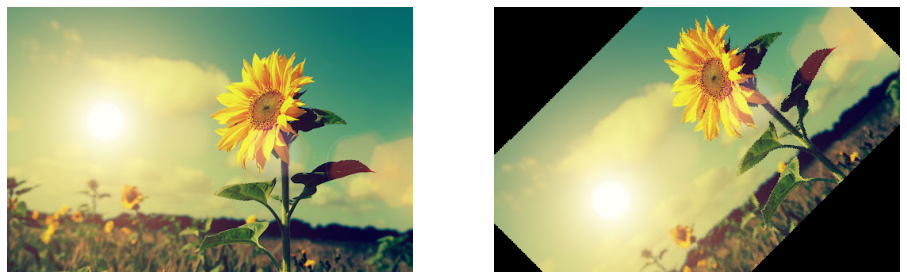

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate(img,change_angle_to_radius_unit(45),(img.shape[1]//2,img.shape[0]//2, ),img.shape[:2])
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()

**Yêu cầu 2 (*)(Optional): Ảnh đã được xoay có kích thước thay đổi kích thước phù hợp để đảm bảo các thông tin trong ảnh input không bị mất. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)**

Opencv sử dụng affine transformation (2x3) 
$ M =  \left[ {\begin{array}{cc}
    \alpha & \beta  & (1-\alpha)*xCenter - \beta*yCenter\\
    -\beta & \alpha &  \beta*xCenter + (1-\alpha)*yCenter\\
  \end{array} } \right]$

$\alpha=scale*cos(\theta)$

$\beta=scale*sin(\theta)$

$\theta$ là góc xoay 

Trường hợp này scale = 1 (ảnh input được chứa trong ảnh xoay sẽ bằng size ảnh input (ảnh xoay có size > size input)). Và luôn xoay ở trung tâm ảnh (pivot_point là center của ảnh)

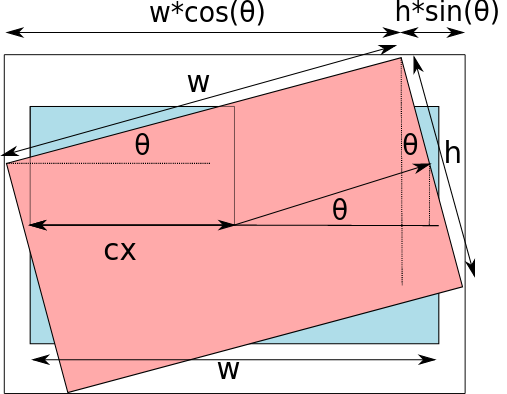

- Từ hình trên tính được ảnh output sau khi xoay sẽ có kích thước 

new_width $= h*sin(\theta)+w*cos(\theta)$

new_height $= h*cos(\theta)+w*sin(\theta)$

vì ảnh thay đổi kích thước nên M cũng thay đổi 

$
M =  \left[ {\begin{array}{cc}
    \alpha & \beta  & (1-\alpha)*xCenter - \beta*yCenter + (new\_width/2 - xCenter)\\
    -\beta & \alpha &  \beta*xCenter + (1-\alpha)*yCenter + (new\_height/2 - yCenter)\\
  \end{array} } \right]$

In [ ]:
def rotate_bound(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # lấy affine transformation matrix M trong trường hợp xoay và bị cắt mất ảnh 
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

    # Lấy các giá trị cần cho việc chỉnh sửa M để xoay không bị cắt ảnh 
    # lấy alpha và beta 
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # Tính toán size của ảnh output sau khi xoay 
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # Thay đỏi M để xoay ko bị cắt mất ảnh 
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # xoay ảnh dựa trên M 
    return cv2.warpAffine(image, M, (nW, nH))

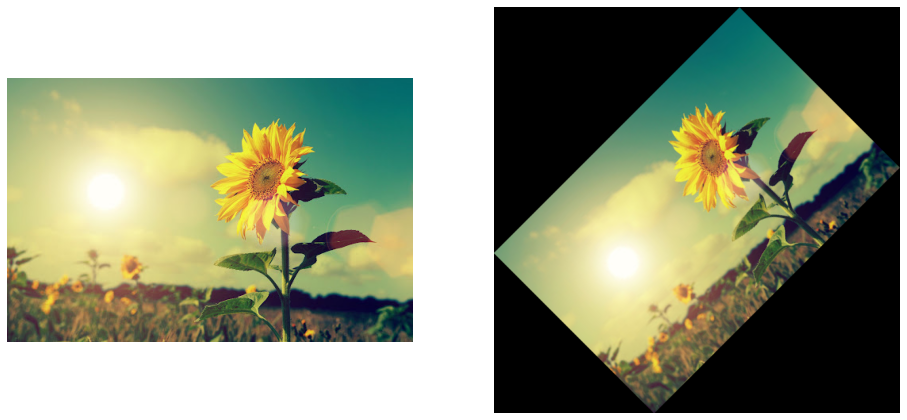

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate_bound(img, 45)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()

##HW2

Viết chương trình sử dụng kỹ thuật background substraction để trích xuất forgeground (object mong muốn) và dán vào background mới. 

- Input: 3 ảnh **Background 1**, **Background 2**, **Observed image**

- Output: là ảnh mới khi trích xuất object từ **Observed image** và dán vào **Background 2**

- **Gợi Ý:**
    - Đưa cả 3 ảnh về cùng kích thước
    - Dùng background substraction với**Observed image** và **Background 1** để lấy mask object (object ở đây là người MC mặc áo đỏ)
    - Mask object là ảnh binary (Foreground Mask) sẽ gồm 2 giá trị 0 là background, = 1 các vùng pixel chứa object.
    - Tạo ra ảnh output (New image) vị trí pixel nào = 1 thì lấy giá trị của **Observed image** và vị trí nào = 0 thì lấy giá trị của **Background 2**

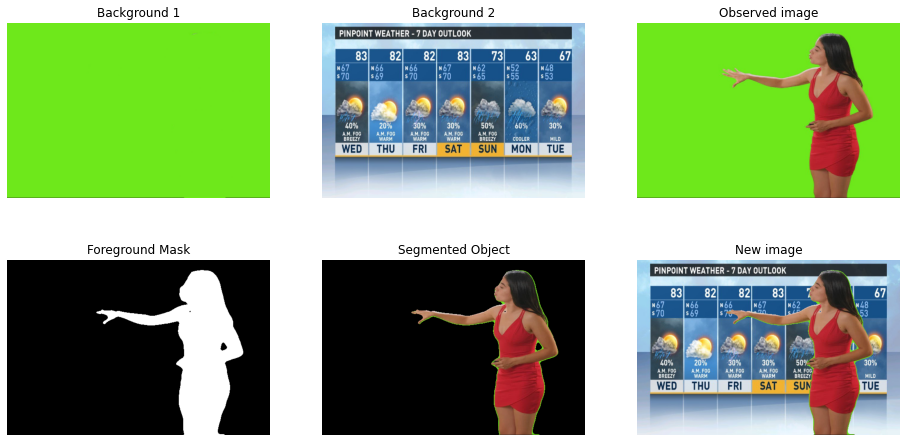

--------------------------------------------------------
**SOLUTION**

- **Step1:** Xử lý ảnh, đưa các ảnh input về cùng một size, convert sang ảnh gray và chỉ dùng Gaussian blur để giảm nhiễu cho ảnh chứa object 
- **Step2:** Tính toán absolute sự khác biệt giữa ảnh có object và **background 1** để lấy được vùng object (thường sẽ có giá trị khác biệt lớn hơn vùng background). Khi gía trị khác biệt này > ngưỡng (xác định trước) được coi là vùng có object ngược lại là background. Đưa về ảnh binary giá trị 0 là background, giá trị 1 là object.
- **Step3:** Ảnh mask là binary chỉ có 1 channel, trong khi ảnh obejct và ảnh **background 2** là ảnh màu có 3 channel. Tạo ảnh mask3dim = cách chồng 3 ảnh mask lên nhau. 
- **Step4:** Vị trí nào trên mask có giá trị = 1 thì thay bằng gía trị có vị trí tường ứng trong ảnh object. Ngược lại, thay giá trị trong **background 2**.

In [ ]:
!gdown --id '1eo6HTPO4Rg7EfvAWZdj3sSqavozjO7U3'
!gdown --id "1RtDrlcEi4b9zQdMtERE8xIDXiM25Gqwj"
!gdown --id "1XXDJGHy_urljg400UhhKHeKIyvoACv5f"

Downloading...
From: https://drive.google.com/uc?id=1eo6HTPO4Rg7EfvAWZdj3sSqavozjO7U3
To: /content/weather_forecast.jpg
100% 83.3k/83.3k [00:00<00:00, 27.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RtDrlcEi4b9zQdMtERE8xIDXiM25Gqwj
To: /content/background4.png
100% 6.89k/6.89k [00:00<00:00, 22.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XXDJGHy_urljg400UhhKHeKIyvoACv5f
To: /content/pg4.png
100% 195k/195k [00:00<00:00, 67.7MB/s]


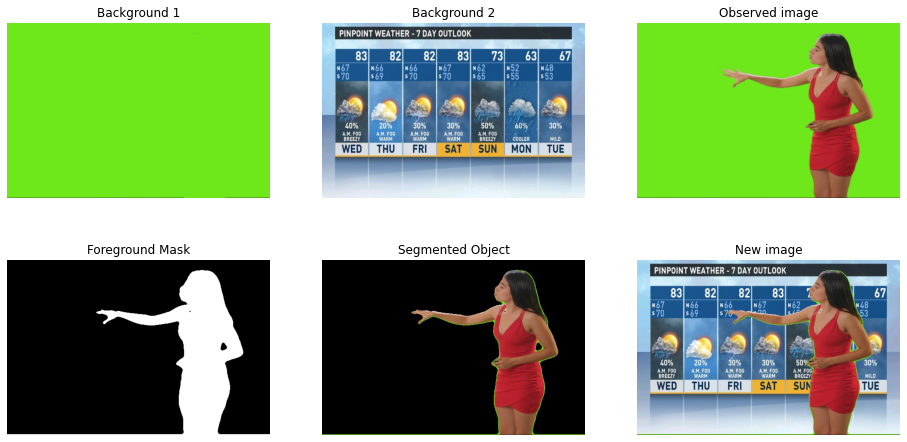

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

bg_path = '/content/background4.png'
new_bg_path = '/content/weather_forecast.jpg'
obs_path = '/content/pg4.png'

def preprocessing_image(image_path, denoising=True, img_size=(600, 400)):
    image = cv2.imread(image_path)
    # Cần phải resize các ảnh cùng 1 kích thước
    rez_image = cv2.resize(image, img_size)
    gray_image = cv2.cvtColor(rez_image, cv2.COLOR_BGR2GRAY)
    # Sử dụng gaussian blur để hạn chế nhiễu
    if denoising:
        gray_image = cv2.GaussianBlur(gray_image, (5,5), 0)
    return rez_image, gray_image

def gray_diff(bg_path, obs_path, new_bg_path, img_size=(600, 400)):
    # Preprocessing image
    bg_img, gray_bg_img = preprocessing_image(bg_path, denoising=False, img_size=img_size)
    obs_img, gray_obs_img = preprocessing_image(obs_path, denoising=True, img_size=img_size)
    new_bg_img, gray_new_bg = preprocessing_image(new_bg_path, denoising=False, img_size=img_size)
    
    # Tính absolute khác biệt giữa ảnh có obejct và background 1
    difference = cv2.absdiff(gray_bg_img, gray_obs_img)
    
    # Tạo ảnh binary giá trị < 10 sẽ được assign = 0, và giá trị > 10 sẽ được assign = 255
    _, mask = cv2.threshold(difference, thresh=10, maxval=255, type=cv2.THRESH_BINARY)
    
    # Dùng median blur giảm nhiễu 
    mask = cv2.medianBlur(mask, 9)

    # Tạo ảnh mask 3 channels để dùng cho ảnh color hiện tại có 3 channels (B, G, R)
    # đưa về 2 giá trị 0: background, 1: forgeground
    mask_3dims = np.expand_dims(np.where(mask > 0, 1, 0), axis=2) * np.ones((img_size[1], img_size[0], 3), dtype=np.uint8)
    
    # Giúp lấy ảnh object (phục vụ debug)
    seg_obj = mask_3dims * obs_img

    # Dùng mask 3 channels này để dán obejct vào background mới 
    masked_img = np.where(mask_3dims==0, new_bg_img, obs_img )

    return bg_img, new_bg_img, obs_img, mask_3dims*255, seg_obj, masked_img
    # return gray_bg_img, gray_obs_img, gray_new_bg, mask_3dims*255, seg_obj, masked_img


# bg_img, obs_img, new_bg_img, mask_3dims, seg_obj, masked_img 
results = gray_diff(bg_path, obs_path, new_bg_path, img_size=(600, 400))

fig = plt.figure(figsize=(16,8))
name_list = ['Background 1', 'Background 2', 'Observed image', 'Foreground Mask', 'Segmented Object', 'New image']
for idx, img in enumerate(results):
    fig.add_subplot(2,3,idx+1)
    plt.title(name_list[idx])
    plt.axis('off')
    plt.imshow(results[idx][..., ::-1])

plt.show()


## HW3

Viết chương trình tìm kiếm **n** ảnh (trong tập fruit datasset) có đặc điểm tương tự với ảnh input nhất. Sử dụng cosine similarity để so sánh các ảnh với nhau.

VD:

Input: test image 

Ouput: top **n**=5 ảnh có đặc điểm tương tự như như atnh test image

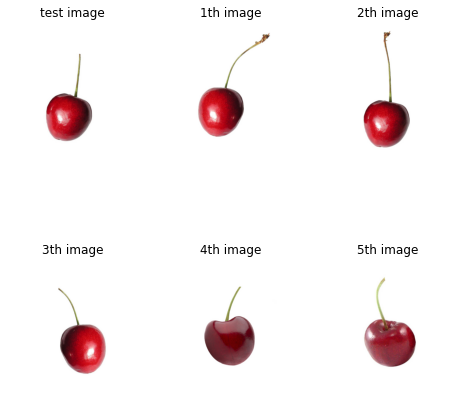

-------------------------------------------------
**SOLUTION**

- **Step1:** Tạo hàm tính cosine similarity cho 2 ảnh để so sánh 
- **Step2:** Tính histogram cho toàn bộ ảnh 
- **Step3:** Tính histogram cho ảnh test và dùng histogram này tính độ tương đồng (dùng cosine similarity) với các ảnh trong tập dataset.
- **Step4:** Lấy n (num_img) ảnh có giá trị cosine similarity lớn nhất. Thực tế cần lấy num_img+1 do mình dùng ảnh test trong data nên ảnh có giá trị cao nhất chính là ảnh test

In [ ]:
!gdown --id "1TJIzqn6q7WPB8oCMbb4Ye9WFdVTzjWDT"

Downloading...
From: https://drive.google.com/uc?id=1TJIzqn6q7WPB8oCMbb4Ye9WFdVTzjWDT
To: /content/fruits.zip
13.2MB [00:00, 61.7MB/s]


In [ ]:
!unzip "/content/fruits.zip"

In [ ]:
data_path = "/content/fruits"

In [ ]:
import cv2
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
def cal_hist(image):
    rez_image = cv2.resize(image, (600,600))
    gray_image = cv2.cvtColor(rez_image, cv2.COLOR_BGR2GRAY)
    histogram = cv2.calcHist([gray_image], [0],
                         None, [256], [0, 256])
    return histogram

def cal_cos_sim(image1, image2):
    a = image1.flatten()
    b = image2.flatten()
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

def find_similar_imgs(test_image_path, images_dir, num_img=5):
    # Tính histogram cho toàn bộ tập data 
    list_img_path = np.array(os.listdir(images_dir))
    list_hist_img = [cal_hist(cv2.imread(os.path.join(images_dir, img_path))) for img_path in list_img_path]

    # Tính histogram cho ảnh test
    test_image = cv2.imread(test_image_path)
    hist_test_image = cal_hist(test_image)
    
    # Tính cosine similarity giữa ảnh test với toàn bộ ảnh trong dataset
    # Sắp xếp cosine similarity và lấy các n (num_img) ảnh có giá trị lớn nhất 
    list_scores = [cal_cos_sim(hist_test_image, hist_img) for hist_img in list_hist_img]
    
    # Sắp xếp từ bé đên lớn dùng [::-1] để đảo ngược từ lớn đến bé 
    # Lấy num_img+1 do ở đây mình lấy ảnh test trong tập data nên ảnh có cosine similarity lớn nhất chính là ảnh đó
    top_similar_images = np.argsort(list_scores)[::-1][:num_img+1]
    # print(np.array(list_scores)[top_similar_images])

    return list_img_path[top_similar_images]




(256, 1)
(256,)
1 (104).jpg
1 (56).jpg
1 (79).jpg
1 (153).jpg
1 (57).jpg
1 (106).jpg


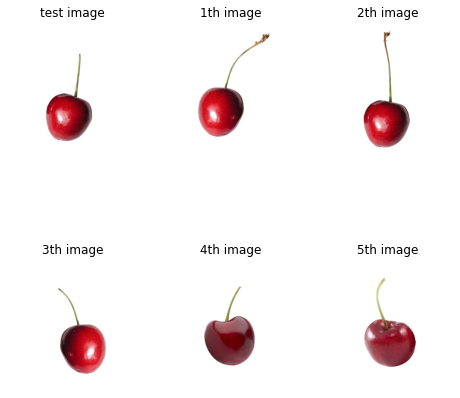

In [ ]:
test_image_path = '/content/fruits/1 (104).jpg'
images_dir = '/content/fruits/'
num_img = 5
top_similar_images_path = find_similar_imgs(test_image_path, images_dir, num_img=num_img)
# print(top_similar_images_path)
fig = plt.figure(figsize=(8,8))

for idx_img, img_path in enumerate(top_similar_images_path):
    fig.add_subplot(2,3, idx_img+1)
    if idx_img ==0:
        name = 'test image'
    else:
        name = "{}th image".format(idx_img)
    plt.title(name)
    plt.axis('off')
    print(img_path)
    img = cv2.imread(os.path.join(images_dir, img_path))
    plt.imshow(img[...,::-1])
plt.show()


## HW4

Viết một function trả về disparity map từ 2 ảnh đầu vào (left và right image) dựa trên các stereo atching algorithm sau:
- SAD (Sum of Absolute Differences)
- SSD (Sum of Squred Differences)
- Cosine similarity 

Input: left image, right image, maximum disparity, windown size và tên thuật toán

Output: Disparity map 

- Khi tăng windown size thì việc gì sẽ xảy ra?
- Kết quả của SAD và SSD có gì khác nhau?



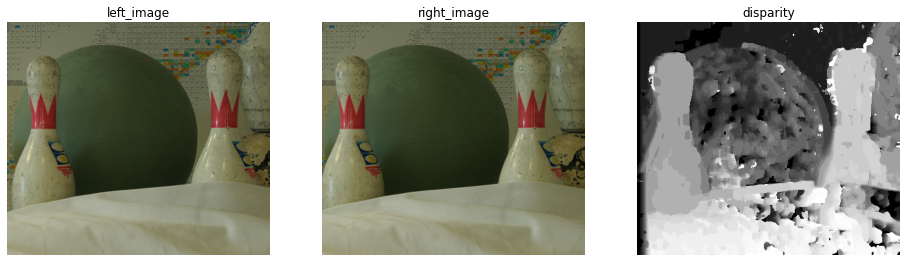

Thuật toán của stereo matching:

$d_p =  \underset{d \in D}{\mathrm{argmin}}(C(p,q))$ cho SAD và SSD 

$d_p =  \underset{d \in D}{\mathrm{argmax}}(C(p,q))$ cho cosine similarity 

$q = (x_p - d, y_p)$

- **SAD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}|L(u)-R(v)|$ 

- **SSD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}(L(u)-R(v))^2$ 

- **Cosine similarity**: $C(p,q) =  cs(W_p, W_q)$ 

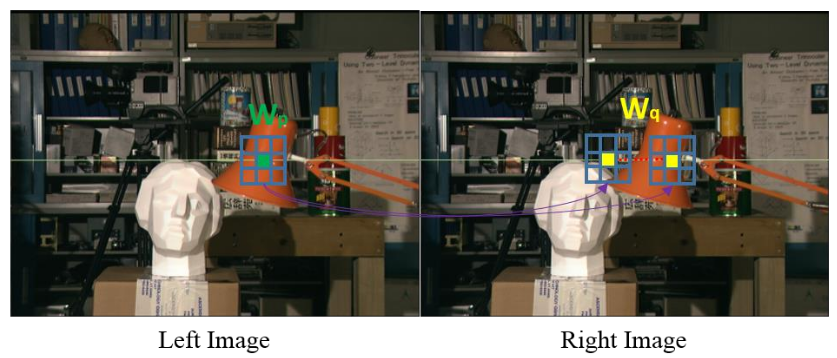

--------------------------------------------------------
**SOLUTION**

- **Step1**: Tiền xử lý ảnh (chuyển sang ảnh gray, giảm nhiễu, ...)
- **Step2:** Khởi tạo disparity_maps có d (maximum disparity) channel với mỗi channel có kích thước bằng ảnh input. 
- **Step3:** Xây dựng các thuật toán cho SAD, SSD, và cosine similarity dựa theo công thức.
- **Step4:** Mỗi channel trong disparity_maps là kết quả của ảnh left so với ảnh right khi shift từ trái sang phải từ 0 đến d dựa trên SAD hoặc SSD hoặc cosine similarity. Mỗi channel trong disparity_maps tương ứng khi shift ảnh right (d)
- **Step5** dựa vào disparity_maps sẽ tính max hoặc min theo chiều d (tùy thuộc thuật toán sử dụng SAD và SSD là min trong khi cosine similarity là max) để lấy được disparity map thực sự

- Khi tăng windown size thì việc gì sẽ xảy ra? window quá nhỏ sẽ ít thông tin hơn trong việc tìm điểm tương đồng giữa các vị trí (do ít đặc trưng). Tuy nhiên window quá lớn sẽ làm chứa nhiều thông tin không cần thết làm sai lệch kết qủa
- Kết quả của SAD và SSD có gì khác nhau? SSD thường sẽ cho kết quả tốt hơn SAD bỏi vị một sự khác biệt nhỏ sẽ được làm lớn lên do bình phương giá trị, do đó vị trị 2 pixel tương đồng sẽ đuuợc tìm tốt hơn. Tuy nhiên SAD sẽ ít bị ảnh hưởng bởi nhiễu có giá trị lớn (outlier) hơn là SSD, vì các outlier trong SDD đã được bình phương lên.


In [ ]:
!gdown --id "1f1gnkuO5nn7QLYcONZx7xbodj7ynVoPi"

Downloading...
From: https://drive.google.com/uc?id=1f1gnkuO5nn7QLYcONZx7xbodj7ynVoPi
To: /content/left.png
100% 254k/254k [00:00<00:00, 35.3MB/s]


In [ ]:
!gdown --id "1rc7Tjj1kVU-01f2G_idx9nRntiKNdCtw"

Downloading...
From: https://drive.google.com/uc?id=1rc7Tjj1kVU-01f2G_idx9nRntiKNdCtw
To: /content/right.png
100% 254k/254k [00:00<00:00, 37.3MB/s]


In [ ]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt
%matplotlib inline 


def preprocess_frame(path):
    orig_image = cv2.imread(path)
    gray_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(gray_image)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return orig_image, image

def calculate_disparity_matrix(left_image_path, right_image_path, maximum_disparity, windown_size, algorithm_name):
    # Tiền xử lý giảm nhiễu 
    orig_left_image, left_image = preprocess_frame(left_image_path)
    orig_right_image, right_image = preprocess_frame(right_image_path)
    
    # tạo kernel (sliding window) 
    kernel = np.ones([windown_size, windown_size])

    # Tạo ra disparity_maps có channels = d (maximum_disparity)
    disparity_maps = np.zeros(
        [left_image.shape[0], left_image.shape[1], maximum_disparity])
    
    for d in range(0, maximum_disparity):
        # shift ảnh right_image từ trái sang phải max step là d theo chiều x
        translation_matrix = np.float32([[1, 0, d], [0, 1, 0]])
        shifted_image = cv2.warpAffine(
            right_image, translation_matrix,
            (right_image.shape[1], right_image.shape[0]))
        
        if algorithm_name == 'SAD':
            # Tính abs differences với từng ảnh được shift 
            SAD = abs(np.float32(left_image) - np.float32(shifted_image))
            # Dùng kernel để tính SAD cho mỗi điểm ảnh
            filtered_image = cv2.filter2D(SAD, -1, kernel)
        elif algorithm_name == 'SSD':
            # calculate squared differences
            SSD = np.float32(left_image) - np.float32(shifted_image)
            SSD = SSD**2
            # Dùng kernel để tính SSD cho mỗi điểm ảnh
            filtered_image = cv2.filter2D(SSD, -1, kernel)

        elif algorithm_name == 'Cosine similarity':
            # Tính dot product của 2 ảnh 
            multiplied_matrix = np.float32(left_image) * np.float32(shifted_image)
            numerator = cv2.filter2D(multiplied_matrix, -1, kernel)
            
            # tính tích norm 2 của 2 ảnh 
            squared_norm_left = cv2.filter2D(np.float32(left_image)**2, -1, kernel)
            squared_norm_shifted = cv2.filter2D(np.float32(shifted_image)**2, -1, kernel)
            denominator = np.sqrt(squared_norm_left*squared_norm_shifted) + 1e-6
            
            # Tính cosine similarity cho từng điểm ảnh 
            filtered_image = numerator/denominator

        else:
            raise Exception('Wrong Algorithm Name')

        disparity_maps[:, :, d] = filtered_image

    if algorithm_name == 'Cosine similarity':
        # cosine similarity cần tìm max (giống nhau nhất)
        disparity = np.argmax(disparity_maps, axis=2)
        # Scale về giá trị ảnh thực 
        disparity = np.uint8(disparity * 255 / maximum_disparity)
        disparity = cv2.equalizeHist(disparity)
    else:
        # SAD, SSD cần tìm min (giống nhau nhất)
        disparity = np.argmin(disparity_maps, axis=2)
        # Scale về giá trị ảnh thực 
        disparity = np.uint8(disparity * 255 / maximum_disparity)
        disparity = cv2.equalizeHist(disparity)

    return orig_left_image, orig_right_image, disparity

    

# Sử dụng opencv 
# def calculate_disparity_inbuilt(args):
#     left_image = preprocess_frame(args[1])
#     right_image = preprocess_frame(args[2])
#     rows, cols = left_image.shape
#     stereo = cv2.StereoBM_create(numDisparities=maximum_disparity,
#                                  blockSize=windown_size)
#     disparity = stereo.compute(left_image, right_image)
#     plt.imshow(disparity, cmap='gray', vmin=0, vmax=255)
#     plt.show()

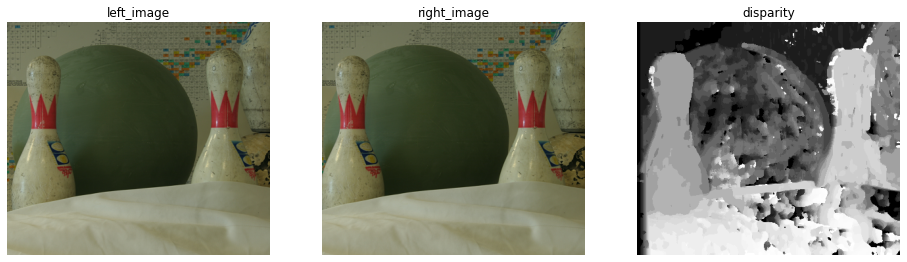

In [ ]:
left_image_path = "/content/left.png"
right_image_path = "/content/right.png"
maximum_disparity = 64  
windown_size = 9  
# algorithm_name = 'Cosine similarity'
algorithm_name = "SAD"
orig_left_image, orig_right_image, disparity = calculate_disparity_matrix(left_image_path, 
                                                                           right_image_path,
                                                                           maximum_disparity, 
                                                                           windown_size, 
                                                                           algorithm_name)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,3,1)
plt.title('left_image')
plt.axis('off')
plt.imshow(orig_left_image[...,::-1])

fig.add_subplot(1,3,2)
plt.title('right_image')
plt.axis('off')
plt.imshow(orig_right_image[...,::-1])

fig.add_subplot(1,3,3)
plt.title('disparity')
plt.axis('off')
plt.imshow(disparity, cmap='gray', vmin=0, vmax=255)


plt.show()